# 8. Predective Modelling

## 8.1. Linera Regression to predict overall Score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [3]:
data = pd.read_csv('cleaned.csv')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

features = ['study_hours', 'attendance_percentage']
X = data[features]
y = data['overall_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.9101331738469924
MAE: 4.993189019162569


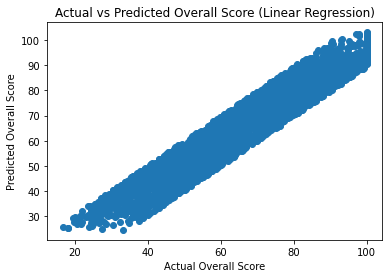

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Overall Score")
plt.ylabel("Predicted Overall Score")
plt.title("Actual vs Predicted Overall Score (Linear Regression)")
plt.show()


The points align closely along the diagonal, indicating that the linear regression model captures the overall trend effectively. Minor dispersion around the line reflects natural variability, but no strong systematic bias is observed.

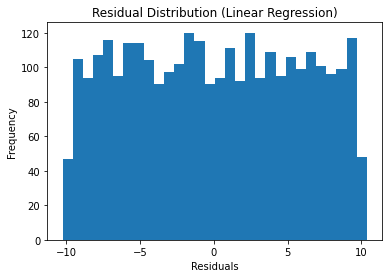

In [14]:
residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Linear Regression)")
plt.show()


Residuals are centered around zero with a roughly symmetric spread, suggesting that the model errors are unbiased and the linearity assumption is reasonably satisfied.

Linear regression confirms that study hours and attendance explain a substantial portion of performance variation, validating their use as primary drivers in predictive and planning models.

## 8.2. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data['pass_fail'] = (data['overall_score'] >= 60).astype(int)

X = data[['study_hours', 'attendance_percentage']]
y = data['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1310
           1       0.92      0.94      0.93      1690

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



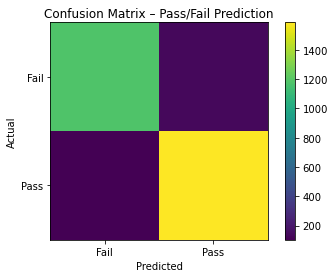

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.xticks([0,1], ['Fail','Pass'])
plt.yticks([0,1], ['Fail','Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Pass/Fail Prediction")
plt.colorbar()
plt.show()


The confusion matrix shows strong performance in identifying passing students, with fewer misclassifications among high-study students. Misclassification is more common near the passing threshold.

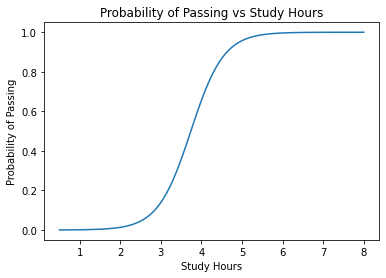

In [18]:
import numpy as np

study_range = np.linspace(
    data['study_hours'].min(),
    data['study_hours'].max(),
    100
)

attendance_mean = data['attendance_percentage'].mean()

X_prob = pd.DataFrame({
    'study_hours': study_range,
    'attendance_percentage': attendance_mean
})

prob_pass = log_model.predict_proba(X_prob)[:,1]

plt.figure()
plt.plot(study_range, prob_pass)
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Probability of Passing vs Study Hours")
plt.show()


The probability curve shows a sharp increase in passing likelihood as study hours rise, confirming study effort as the strongest lever for academic success.

Logistic regression highlights that incremental increases in study hours substantially improve the probability of passing, making it a high-impact intervention variable.

## 8.3. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X = data[['study_hours', 'attendance_percentage', 'age']]
y = data['overall_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

importance = pd.Series(tree.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


R² Score: 0.8738892134208488
study_hours              0.92414
attendance_percentage    0.07586
age                      0.00000
dtype: float64


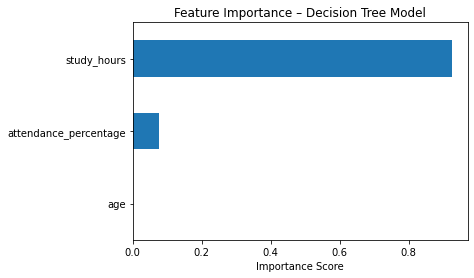

In [21]:
importance.sort_values().plot(kind='barh')
plt.xlabel("Importance Score")
plt.title("Feature Importance – Decision Tree Model")
plt.show()


The decision tree assigns the highest importance to study hours, followed by attendance. Demographic variables contribute minimally, reinforcing conclusions from statistical testing.

Tree-based modeling confirms that performance differences are primarily behavior-driven, not demographic-driven, aligning predictive results with inferential findings.

# Predictive Modeling Summary

Across all models, study hours consistently emerge as the dominant predictor of academic performance, followed by attendance. Linear regression captures overall trends effectively, logistic regression explains pass–fail dynamics near the threshold, and decision trees validate feature dominance through hierarchical splits.

Importantly, demographic variables add little predictive power, indicating that performance improvement strategies should focus on behavioral interventions rather than student segmentation.